In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Prodigy_Infotech/twitter_training.csv'
data = pd.read_csv(file_path)
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                       

In [ ]:
data.columns=['ID','Company','Sentiment','Text']
print(data)

         ID      Company Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    Text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just 

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(Text):
  filtered_text=[]
  #The if statement was indented incorrectly, it should be aligned with the filtered_text=[] line
  if isinstance(Text, str):
      text=Text.lower()
      text=re.sub(r'\@w+|\#','',Text)
      text=re.sub(r'[^\w\s]','',Text)
      text_tokens=word_tokenize(Text)
      filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

data['Text'] = data['Text'].apply(remove_stopwords)

print(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


         ID      Company Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                    Text  
0                              I coming borders I kill ,  
1                          im getting borderlands kill ,  
2                         im coming borderlands murder ,  
3                      im getting borderlands 2 murder ,  
4                        im getting borderlands murder ,  
...                                                  ...  
74676  Just realized Windows partition Mac like 6 yea...  
74677  Just realized Mac window partition 6 years beh...  
74678  Just 

In [ ]:
data=data.head(2000)
print(data.shape)

(2000, 4)


In [ ]:
missing_values=data.isnull().sum()
print(missing_values)

ID           0
Company      0
Sentiment    0
Text         0
dtype: int64


In [ ]:
data['Text'] = data['Text'].fillna(method='ffill').fillna(method='bfill')
print(data)

        ID      Company   Sentiment  \
0     2401  Borderlands    Positive   
1     2401  Borderlands    Positive   
2     2401  Borderlands    Positive   
3     2401  Borderlands    Positive   
4     2401  Borderlands    Positive   
...    ...          ...         ...   
1995  2750  Borderlands    Negative   
1996  2750  Borderlands    Negative   
1997  2751  Borderlands  Irrelevant   
1998  2751  Borderlands  Irrelevant   
1999  2751  Borderlands  Irrelevant   

                                                   Text  
0                             I coming borders I kill ,  
1                         im getting borderlands kill ,  
2                        im coming borderlands murder ,  
3                     im getting borderlands 2 murder ,  
4                       im getting borderlands murder ,  
...                                                 ...  
1995  @ Borderlands need help game . 15 For selfish ...  
1996  @ Borderlands need help game . For folks code ...  
1997  Con

<ipython-input-239-93a23810c36d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Text'] = data['Text'].fillna(method='ffill').fillna(method='bfill')


# **Quick EDA**

<Axes: title={'center': 'Count of ID'}, xlabel='ID'>

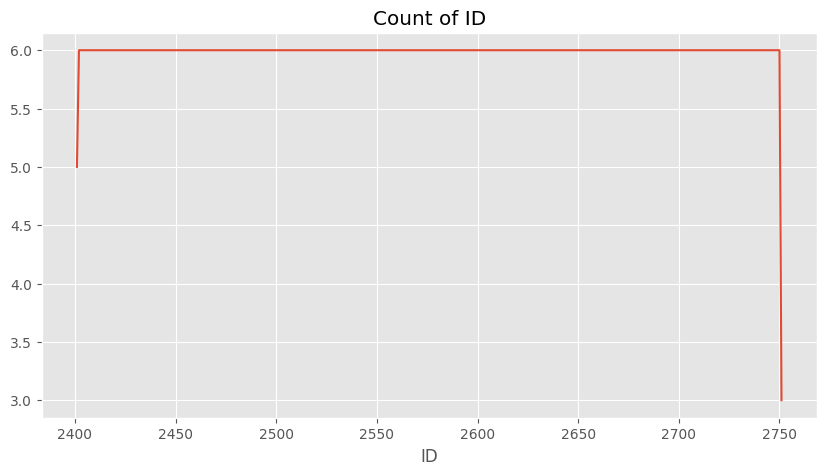

In [ ]:
data['ID'].value_counts().sort_index().plot(kind='line',title='Count of ID',figsize=(10,5))

# **Basic NLTK**

In [ ]:
example=data['Text'][50]
print(example)

Blaming Sight Tardiness ! A little bit borderlands . I got called early work tomorrow I ca n't make time . Sorry loves . twitch.tv/punnisenpai


In [ ]:
nltk.download('punkt')
tokens=nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Blaming',
 'Sight',
 'Tardiness',
 '!',
 'A',
 'little',
 'bit',
 'borderlands',
 '.',
 'I']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Blaming', 'VBG'),
 ('Sight', 'NNP'),
 ('Tardiness', 'NNP'),
 ('!', '.'),
 ('A', 'DT'),
 ('little', 'JJ'),
 ('bit', 'NN'),
 ('borderlands', 'NNS'),
 ('.', '.'),
 ('I', 'PRP')]

In [ ]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Blaming/VBG
  (PERSON Sight/NNP Tardiness/NNP)
  !/.
  A/DT
  little/JJ
  bit/NN
  borderlands/NNS
  ./.
  I/PRP
  got/VBD
  called/VBN
  early/JJ
  work/NN
  tomorrow/NN
  I/PRP
  ca/MD
  n't/RB
  make/VB
  time/NN
  ./.
  (PERSON Sorry/NNP)
  loves/VBZ
  ./.
  twitch.tv/punnisenpai/NN)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


# **Step 1: VADER Sentiment Scoring**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data['Sentiment'] = data['Text'].astype(str).apply(lambda text: sia.polarity_scores(text))
print(data)

        ID      Company                                          Sentiment  \
0     2401  Borderlands  {'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'comp...   
1     2401  Borderlands  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...   
2     2401  Borderlands  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...   
3     2401  Borderlands  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...   
4     2401  Borderlands  {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...   
...    ...          ...                                                ...   
1995  2750  Borderlands  {'neg': 0.278, 'neu': 0.596, 'pos': 0.126, 'co...   
1996  2750  Borderlands  {'neg': 0.139, 'neu': 0.696, 'pos': 0.165, 'co...   
1997  2751  Borderlands  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...   
1998  2751  Borderlands  {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...   
1999  2751  Borderlands  {'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'comp...   

                                                   Text  
0    

In [ ]:
res={}
for i, row in tqdm(data.iterrows(),total=len(data)):
  text=row['Text']
  myid=row['ID']
  res[myid]=sia.polarity_scores(str(text))

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=vaders.merge(data,how='left')

In [ ]:
vaders.head()

,ID,neg,neu,pos,compound,Company,Sentiment,Text
0,2401,0.61,0.39,0.0,-0.6908,Borderlands,"{'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'comp...","I coming borders I kill ,"
1,2401,0.61,0.39,0.0,-0.6908,Borderlands,"{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...","im getting borderlands kill ,"
2,2401,0.61,0.39,0.0,-0.6908,Borderlands,"{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...","im coming borderlands murder ,"
3,2401,0.61,0.39,0.0,-0.6908,Borderlands,"{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...","im getting borderlands 2 murder ,"
4,2401,0.61,0.39,0.0,-0.6908,Borderlands,"{'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compou...","im getting borderlands murder ,"


# **Plot VADER results**

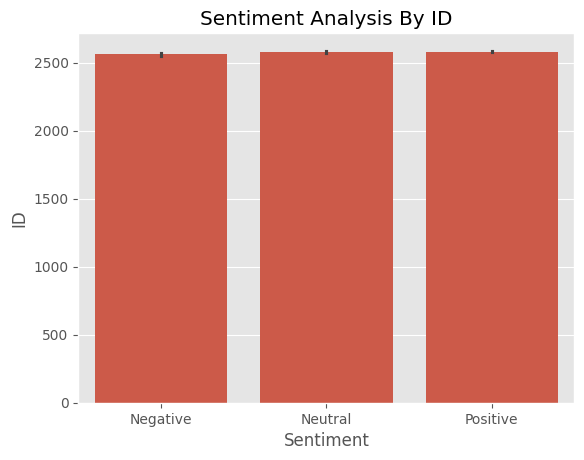

In [ ]:
vaders['Sentiment'] = pd.cut(vaders['compound'],
                               bins=[-1, -0.05, 0.05, 1],
                               labels=['Negative', 'Neutral', 'Positive'])
ax=sns.barplot(data=vaders, x='Sentiment', y='ID')
ax.set_title('Sentiment Analysis By ID')
plt.show()

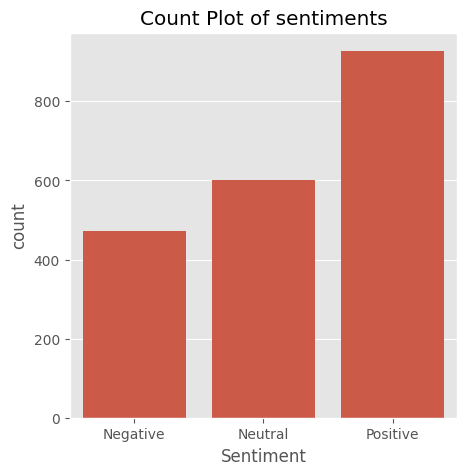

In [ ]:
# Countplot on different types of tweets
fig=plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment',data=vaders)
plt.title('Count Plot of sentiments')
fig.show()

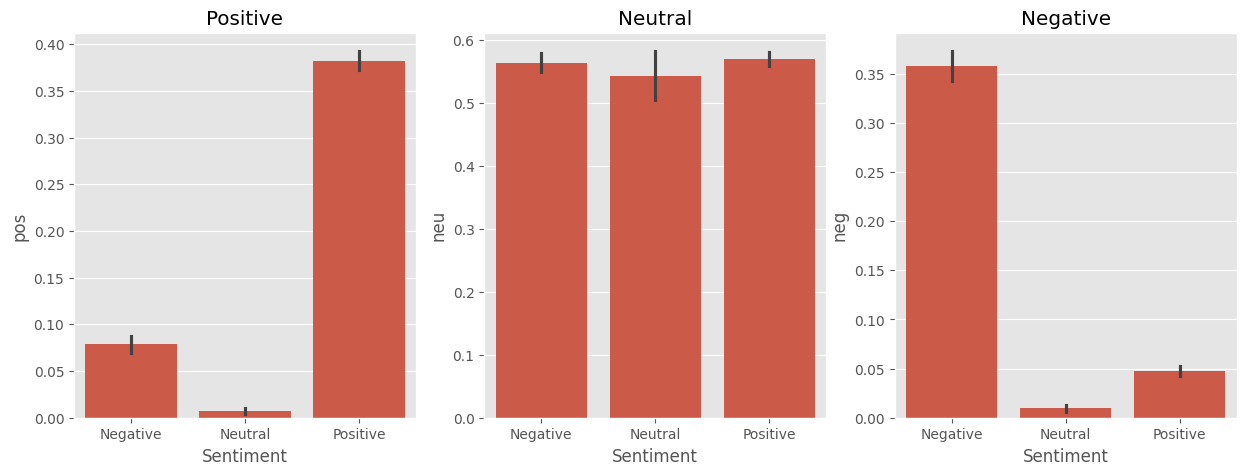

In [ ]:
fig, axs=plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Sentiment', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Sentiment', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Sentiment', y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# **Step 2: Roberta Pretrained Model**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Blaming Sight Tardiness ! A little bit borderlands . I got called early work tomorrow I ca n't make time . Sorry loves . twitch.tv/punnisenpai


{'neg': 0.137, 'neu': 0.641, 'pos': 0.223, 'compound': 0.2533}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.53682613, 'roberta_neu': 0.3562144, 'roberta_pos': 0.10695953}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
results_data = pd.DataFrame(res).T
results_data = results_data.reset_index().rename(columns={'index': 'ID'})
results_data = results_data.merge(data, how='left')

In [ ]:
results_data.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Company', 'Sentiment',
       'Text'],
      dtype='object')

# **Step 3. Combine and compare**

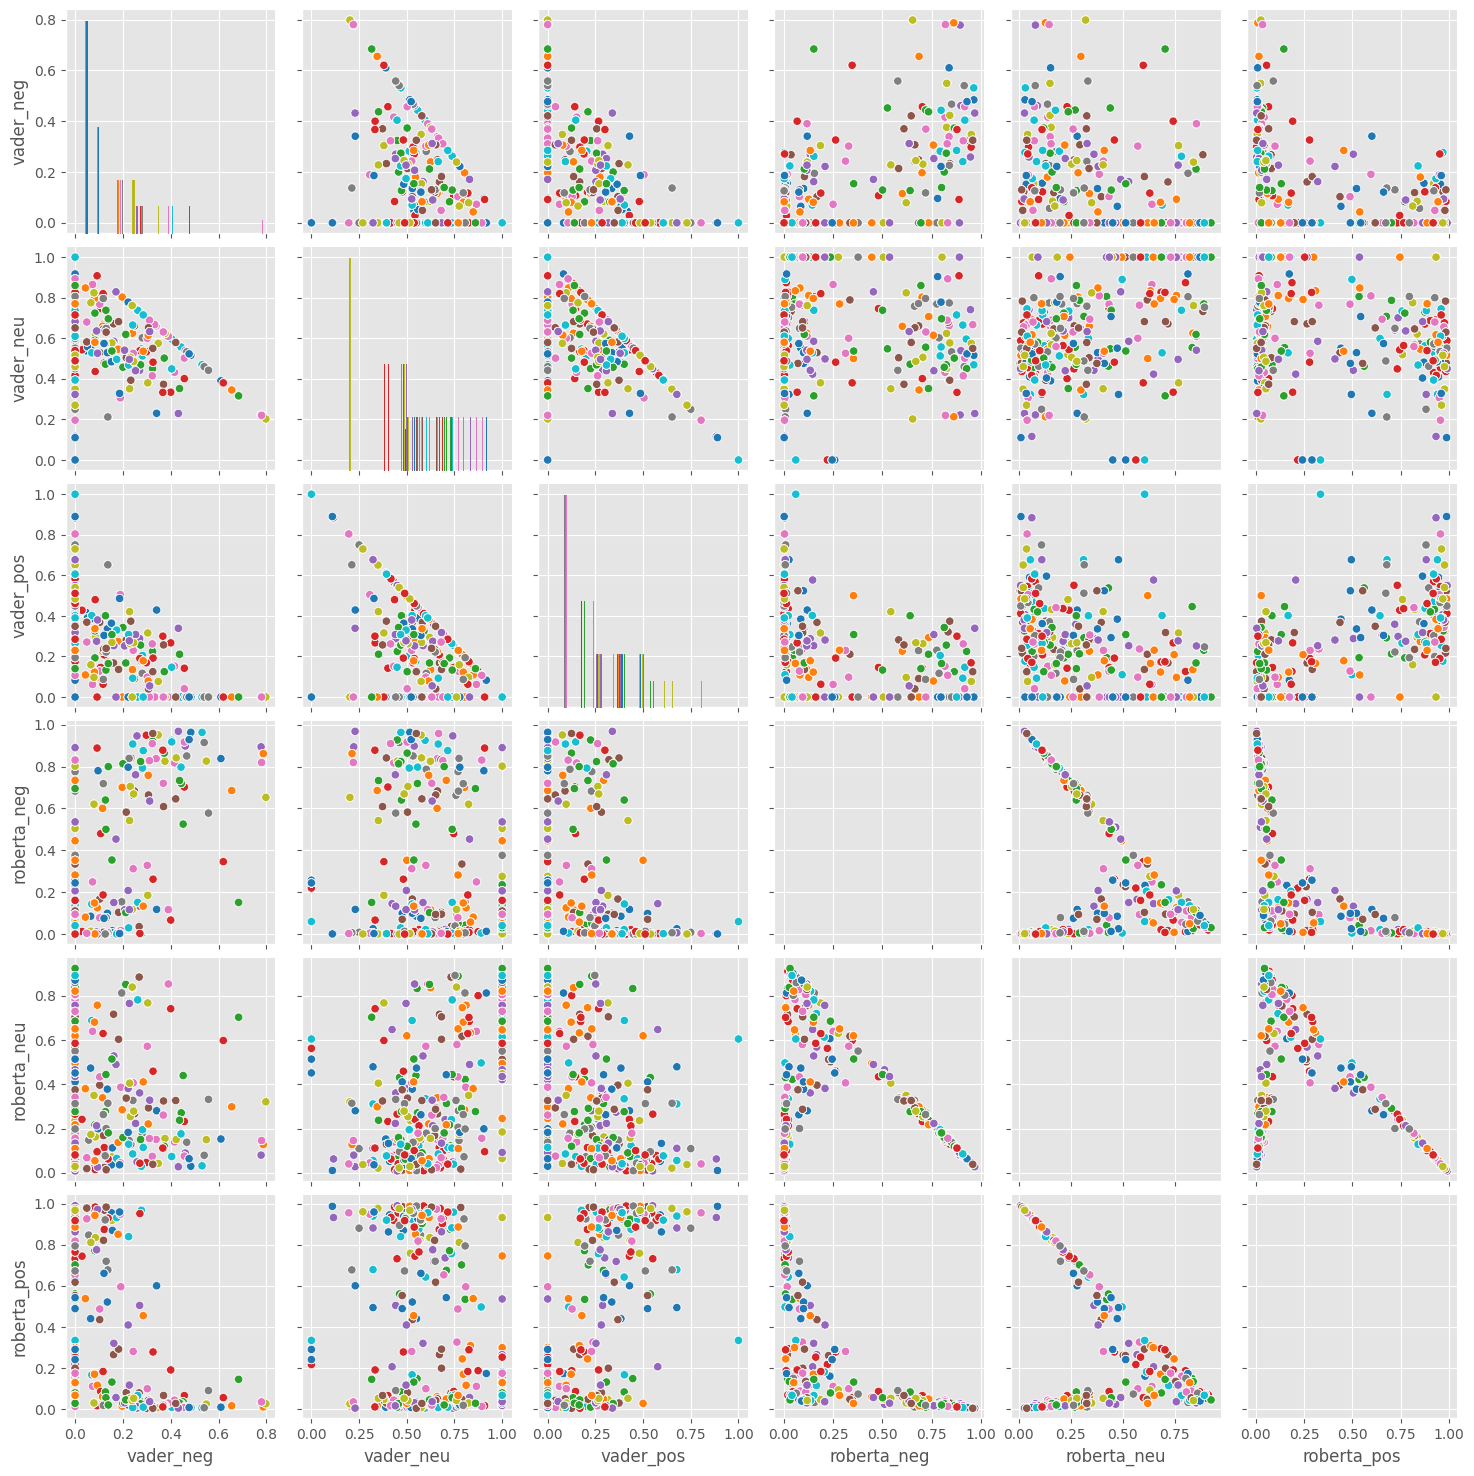

In [ ]:
g=sns.pairplot(data=results_data,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='ID',
            palette='tab10')
g._legend.remove()
plt.show()

# **Step 4: Review Examples:**

In [ ]:
results_data.query('ID==2401') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I coming borders I kill ,'

In [ ]:
results_data.query('ID==2402') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"So I spent hours making something fun . . . If n't know I HUGE @ Borderlands fan Maya one favorite characters . So I decided make wallpaper PC . . Here original image versus creation I made : ) Enjoy ! pic.twitter.com/mLsI5wf9Jg"

# **The Transformers Pipeline**

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
sent_pipeline('im getting on borderlands and i will murder you all ,')

[{'label': 'NEGATIVE', 'score': 0.9834704995155334}]